# INTRODUCTION 

<center><b>This notebook covers the hands-on-exercise on our class conducted to introduce Statistics for Data Science.</b></center> 

We all know That data science is an inter-disciplinary field that combines the knowledge of several field solely to make sense out of data. One of the field is Statistics and this notebook serves as a guide to help ignite an understanding on The two branches of statistics.

# DEFINITION

- What is Statistics ?
- What are The two main Branches of Statistics?

Statistics is defined to be a science and often times called a branch of mathematics thats deals with:
    
 - collection of data
 - organization of the data collected
 - Analysing the organized data
 - Interpreting the analysis done on the data.

so basically we have 4 scientific procedures stated above, we can acronymize these procedures as follows <b>"COAI"</b> for proper understanding.

# BRANCHES OF STATISTICS

The field of Statistics is divided into two (2) main branches namely:
    - Descriptive Statistics.
    - Inferential Statistics.

- <b>Descriptive Statistics:</b>
This is a branch of statistics thats deals with the collection of data from an experiment or survey in other to take a qualitative description or summary of how the data collected looks like. The aim of descriptive statistics is to summarize a sampled data from a given population. it goes to tell us that it is concerned about the properties of an observed data.


- <b> Inferential Statistics:</b>
This is a branch of statistics thats deals with analysing a collected or sampled data in other to help make conclusion, decision, or predict a defined population.

# FUNDAMENTAL OF DESCRIPTIVE STATISTICS

Descriptive statistic is divided into two (2) namely:

    - Measure of central tendency
    - Measure of variability
    - Measure of Position
    - Measure of Frequency

- Method of presenting results from descriptive statistics
        
        -Presentation by charts
        -Presentation using statistic (qualitative or quantitative value)

### Measure of Frequency

Measure of frequency is used to describe Qualitative variables e.g  count of a features with two or more category, under it we have:
   
    - Count
    - percent

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')

pd.set_option('max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
train.head(3)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69


In [3]:
train['Store_ID'].nunique()

10

In [4]:
train['Store_ID'].value_counts()

BABATUNJI049    620
BABATUNJI013    594
BABATUNJI017    583
BABATUNJI035    515
BABATUNJI046    509
BABATUNJI018    500
BABATUNJI045    483
BABATUNJI027    462
BABATUNJI010    384
BABATUNJI019    340
Name: Store_ID, dtype: int64

In [5]:
train['Item_Type'].value_counts()

Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Item_Type, dtype: int64

In [6]:
pd.set_option('max_rows', None)
train.groupby(['Store_ID', 'Item_Type'])['Item_Type'].count()

Store_ID      Item_Type            
BABATUNJI010  Baking Goods              34
              Breads                    11
              Breakfast                  4
              Canned                    27
              Dairy                     24
              Frozen Foods              35
              Fruits and Vegetables     56
              Hard Drinks               11
              Health and Hygiene        28
              Household                 49
              Meat                      22
              Others                     7
              Seafood                    3
              Snack Foods               48
              Soft Drinks               19
              Starchy Foods              6
BABATUNJI013  Baking Goods              49
              Breads                    19
              Breakfast                  8
              Canned                    44
              Dairy                     44
              Frozen Foods              61
              Frui

Store ID "BABATUNJI049" has the highest sampled item from the survey while Store Id 'BABATUNJI019' appears to be the lowest

In [7]:
train['Item_Sugar_Content'].value_counts(normalize = True) 

Low Sugar          0.609018
Normal Sugar       0.355311
Ultra Low Sugar    0.035671
Name: Item_Sugar_Content, dtype: float64

we can see from the above result that 60% of the item sampled from the ten stores has a low sugar content, 36% of the content has a normal sugar content, where the remaining 4% has ultra low sugar content

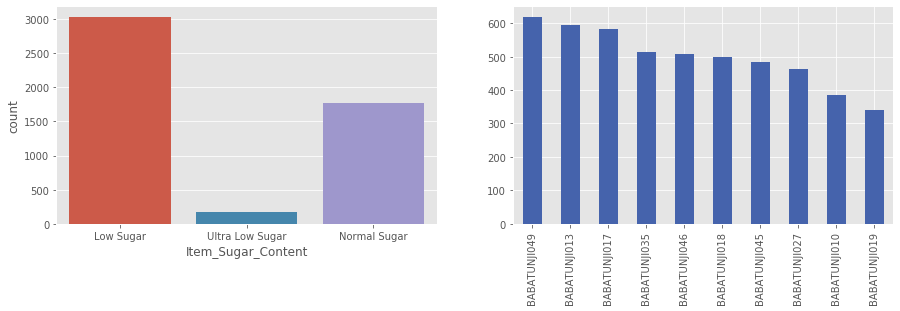

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))
train['Store_ID'].value_counts().plot(kind = 'bar', color = '#4563ac')
sns.countplot('Item_Sugar_Content', data = train, ax = ax1);

### Measure of Central Tendency

They are used to explain the characteristics of a distribution.

Measure of central tendency is used to describe both Qualitative and Quatitative variables e.g  mean of student score in an examination, under it we have:
    
    - Mean       - Mid-Range
    - Median     - Geometric Mean
    - Mode       - Harmonic Mean

In [9]:
import statistics

mean = train['Item_Store_Returns'].mean()
median = train['Item_Store_Returns'].median()
mode = train['Item_Store_Returns'].mode()[0]
#harmonic_mean = statistics.harmonic_mean(train['Item_Store_Returns'])

print("The mean value is = {:.0f}\nThe Median Value is = {:.0f}\nThe modal value is = {:.0f}".format(mean, median, mode))

The mean value is = 6104
The Median Value is = 5375
The modal value is = 3076


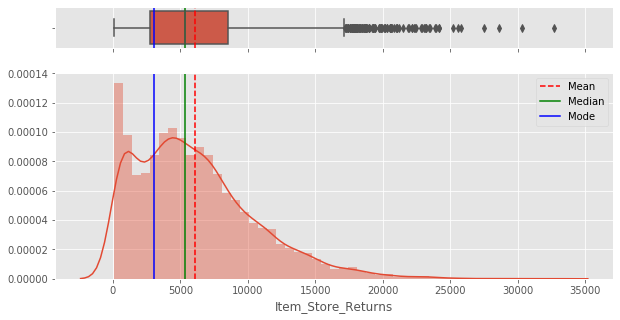

In [11]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize = (10,5))

sns.boxplot(train["Item_Store_Returns"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(train["Item_Store_Returns"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

From the above distribution plot we can see the lines shown on the graphs:
    
     - The blue line shows the position of the modal value
     - The green line shows the actual position of the median value
     - The dotted red line shows the position of the mean value

### Measure of Variability

This is use when you want to know how spread out your data is from the mean, under it we have :
   
    - Variance
    - Standard Devaiation
    - Range

In [12]:
variance = train['Item_Store_Returns'].var()
Std_dev = train['Item_Store_Returns'].std()
Rng = train['Item_Store_Returns'].max() - train['Item_Store_Returns'].min()

print("The Variance value is = {:.0f}\nThe Standard Deviation Value is = {:.0f}\nThe Range value is = {:.0f}".format(variance,
                                                                                                                     Std_dev,Rng))

The Variance value is = 19778778
The Standard Deviation Value is = 4447
The Range value is = 32634


The variance value is way far from the mean value, and this could be suggesting presence of outliers. It goes to tell us that further investigation can be carried out on the distribution of the target variable.

### Measure of Shape

     - Skewness
     - Kurtosis
- skewness tells you the amount and direction of skew (departure from horizontal symmetry)
-  kurtosis tells you how tall and sharp the central peak is, relative to a standard bell curve. (In simple terms, one can say it is a measure of how heavy tail is compared to a normal distribution.)

In [13]:
from scipy.stats import kurtosis
item_weight_skew = train['Item_Weight'].skew()
#item_weight_kurt = kurtosis(train['Item_Weight'])
print(item_weight_skew)

0.06251531645985602


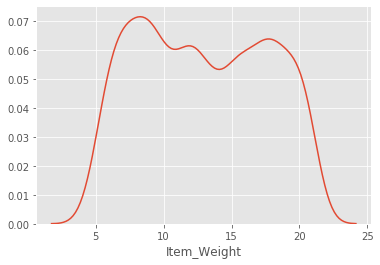

In [14]:
sns.distplot(train['Item_Weight'], hist = False);

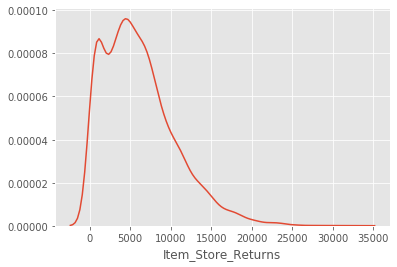

In [15]:
sns.distplot(train['Item_Store_Returns'], hist = False);

The above shape of the distributed shows that it is skewed and need transformations to keep it normal

In [16]:
import scipy.stats as stats

normal_statistics, pvalue1 = stats.shapiro(train['Item_Store_Returns'])
pvalue1

7.034518290910582e-43

### Measure of Position

Percentiles and Quartiles are very useful when we need to identify the outlier in our data. They also help us understand the basic distribution of the data.

https://statinfer.com/104-3-4-percentiles-quartiles-in-python/